## EDA dla rejestru Szkół i placówek aktywnych w Polsce na dzień: 10.01.2022r 
1. Baza aktywnych szkół i placówek została pobrana z Rejestru Szkół i placówek oświatowych: https://rspo.gov.pl/
2. Dane dotyczące powierzchni i ludności w przekroju terytorialnym - GUS: https://stat.gov.pl/obszary-tematyczne/ludnosc/

In [1]:
# ładuje biblioteki
import pandas as pd
import datetime
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize": (11.7, 8.27)})

%matplotlib inline

In [2]:
# wczytuje dane z pliku school_prep.csv
df = pd.read_csv("../../way-to-school-date/school_prep.csv")

In [3]:
df.head(3)

,numer_rspo,regon_podmiotu,nip_podmiotu,typ,nazwa,kod_terytorialny_wojewodztwo,kod_terytorialny_powiat,kod_terytorialny_gmina,kod_terytorialny_miejscowosc,kod_terytorialny_ulica,...,rank_ha_dist,rank_population_dist,identyfikator,gminy_nazwa,area_ha,area_km,population_total,population_per_1km,rank_ha,rank_population
0,38801,650689,6.121863e+09,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 2 W BOLESŁAWCU,2,201,201011,935989,20291.0,...,64,97,201011.0,Bolesławiec....................................,2357.0,24.0,38486.0,1633.0,2207,133
1,40746,21270766,6.121833e+09,Przedszkole,MIEJSKIE PRZEDSZKOLE PUBLICZNE NR 7 Z ODDZIAŁA...,2,201,201011,935989,5956.0,...,64,97,201011.0,Bolesławiec....................................,2357.0,24.0,38486.0,1633.0,2207,133
2,17550,27192,6.121125e+09,Zespół szkół i placówek oświatowych,ZESPÓŁ SZKÓŁ ELEKTRONICZNYCH IM. I. DOMEYKI W ...,2,201,201011,935989,23260.0,...,64,97,201011.0,Bolesławiec....................................,2357.0,24.0,38486.0,1633.0,2207,133


In [4]:
df.shape

(55730, 71)

In [5]:
print("Zbiór zawiera {} szkół i pracówek oraz {} zmiennych".format(df.shape[0], df.shape[1]))

Zbiór zawiera 55730 szkół i pracówek oraz 71 zmiennych


In [6]:
print("Zbior zawiera {} duplikatow.".format(df.duplicated().sum()))

Zbior zawiera 0 duplikatow.


In [7]:
print("Zbior zawiera {} zmiennych typu float".format(len(df.select_dtypes("float64").columns)))

Zbior zawiera 12 zmiennych typu float


In [8]:
print("Zbior zawiera {} zmiennych typu int".format(len(df.select_dtypes("int64").columns)))

Zbior zawiera 20 zmiennych typu int


In [10]:
print("Zbior zawiera {} zmiennych typu object".format(len(df.select_dtypes("object").columns)))

Zbior zawiera 39 zmiennych typu object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55730 entries, 0 to 55729
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   numer_rspo                       55730 non-null  int64  
 1   regon_podmiotu                   55730 non-null  int64  
 2   nip_podmiotu                     28564 non-null  float64
 3   typ                              55730 non-null  object 
 4   nazwa                            55730 non-null  object 
 5   kod_terytorialny_wojewodztwo     55730 non-null  int64  
 6   kod_terytorialny_powiat          55730 non-null  int64  
 7   kod_terytorialny_gmina           55730 non-null  int64  
 8   kod_terytorialny_miejscowosc     55730 non-null  int64  
 9   kod_terytorialny_ulica           46086 non-null  float64
 10  wojewodztwo                      55730 non-null  object 
 11  powiat                           55730 non-null  object 
 12  gmina             

## Brakujące dane

In [11]:
print(str(round(df.isnull().any(axis=0).sum() / df.shape[0] * 100, 2)) + "% obserwacji zawiera braki w danych.")

0.05% obserwacji zawiera braki w danych.


In [13]:
nulls_summary = pd.DataFrame(df.isnull().any(), columns=["Nulls"])
nulls_summary["Num_of_nulls [qty]"] = pd.DataFrame(df.isnull().sum())
nulls_summary["Num_of_nulls [%]"] = round((df.isnull().mean() * 100), 2)
nulls_summary = nulls_summary[nulls_summary["Nulls"]]
nulls_summary.sort_values("Num_of_nulls [%]", ascending=False)

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
data_likwidacji,True,55730,100.00
numer_lokalu,True,53091,95.26
nip_organu_prowadzacego,True,45100,80.93
tereny_sportowe,True,44343,79.57
rspo_podmiotu_nadrzednego,True,39671,71.18
nazwa_podmiotu_nadrzednego,True,39671,71.18
typ_podmiotu_nadrzednego,True,39671,71.18
faks,True,31347,56.25
nip_podmiotu,True,27166,48.75
imie_i_nazwisko_dyrektora,True,20852,37.42


In [24]:
# usuwam kolumne data_likwidacji i duplikaty kolumn nazw gmin, powiatów -> z danych GUS
if "data_likwidacji" in df.columns:
    df.drop("data_likwidacji", axis=1, inplace=True)

In [25]:
len(df.columns)

70

## Konwersja danych typu int na object

In [17]:
df.select_dtypes("int").columns

Index(['numer_rspo', 'regon_podmiotu', 'kod_terytorialny_wojewodztwo',
       'kod_terytorialny_powiat', 'kod_terytorialny_gmina',
       'kod_terytorialny_miejscowosc', 'identyfikator_prov', 'area_ha_prov',
       'area_km_prov', 'population_total_prov', 'population_per_1km_prov',
       'rank_ha_prov', 'rank_population_prov', 'identyfikator_dist',
       'area_ha_dist', 'area_km_dist', 'population_total_dist',
       'population_per_1km_dist', 'rank_ha_dist', 'rank_population_dist'],
      dtype='object')

In [45]:
col_list = [
    "regon_podmiotu",
    "kod_terytorialny_wojewodztwo",
    "kod_terytorialny_powiat",
    "kod_terytorialny_gmina",
    "kod_terytorialny_miejscowosc",
    "identyfikator_prov",
    "identyfikator_dist",
    "kod_terytorialny_ulica",
    "nip_podmiotu",
    "regon_organu_prowadzacego",
    "nip_organu_prowadzacego",
    "rspo_podmiotu_nadrzednego",
    "identyfikator",
]

In [46]:
for col in col_list:
    df[col] = df[col].astype("object")

In [47]:
# df.agg(['mean', 'median', 'count'])
df.describe().iloc[:, :20]

,liczba_uczniow,area_ha_prov,area_km_prov,population_total_prov,population_per_1km_prov,rank_ha_prov,rank_population_prov,area_ha_dist,area_km_dist,population_total_dist,population_per_1km_dist,rank_ha_dist,rank_population_dist,area_ha,area_km,population_total,population_per_1km
count,50170.000000,5.573000e+04,55730.000000,5.573000e+04,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,5.573000e+04,55730.000000,55730.000000,55730.000000,51835.000000,51835.000000,5.183500e+04,51835.000000
mean,130.649233,2.121243e+06,21212.461942,3.025775e+06,153.983994,7.748520,6.275435,74054.049901,740.533160,2.434904e+05,774.394276,103.738902,81.853867,8763.349744,87.645780,6.722303e+04,1265.005402
std,182.128510,7.788653e+05,7788.772547,1.376312e+06,84.753783,4.836694,4.356624,54832.531120,548.268027,3.807404e+05,1009.419312,97.247920,85.200411,7747.557813,77.483211,1.039611e+05,11492.796742
min,0.000000,9.411870e+05,9412.000000,9.767740e+05,58.000000,1.000000,1.000000,1331.000000,13.000000,1.968900e+04,19.000000,1.000000,1.000000,99.000000,1.000000,3.360000e+02,4.000000
25%,11.000000,1.518279e+06,15183.000000,2.095258e+06,105.000000,3.000000,2.000000,29282.000000,293.000000,7.391900e+04,80.000000,19.000000,12.000000,2391.000000,24.000000,8.539000e+03,107.000000
50%,71.000000,1.832368e+06,18323.000000,2.891321e+06,128.000000,8.000000,5.000000,64620.000000,646.000000,1.123840e+05,149.000000,66.000000,47.000000,7276.000000,73.000000,2.015200e+04,859.000000
75%,160.000000,2.512246e+06,25123.000000,4.492330e+06,153.000000,12.000000,9.000000,111770.000000,1118.000000,1.975860e+05,1486.000000,181.000000,135.000000,12895.000000,129.000000,7.781300e+04,1646.000000
max,5527.000000,3.555847e+06,35559.000000,5.425028e+06,364.000000,16.000000,16.000000,297644.000000,2975.000000,1.794166e+06,3690.000000,313.000000,313.000000,62362.000000,624.000000,1.794166e+06,919884.000000


In [114]:
black_list = [
    "data_likwidacji",
    "nip_podmiotu",
    "faks",
    "imie_i_nazwisko_dyrektora",
    "nip_organu_prowadzacego",
    "wojewodztwo_nazwa",
    "identyfikator",
    "gminy_nazwa",
    "area_ha",
    "area_km",
    "population_total",
    "population_per_1km",
    "rank_ha",
    "rank_population",
    "identyfikator_prov",
    "powiaty_nazwa",
]

for i in black_list:
    if i in df.columns:
        df.drop(i, axis=1, inplace=True)

In [115]:
col = df.select_dtypes("object").columns

In [116]:
for x in col:
    print("{}: {} unikalnych wartości.".format(x, df[x].nunique()))

typ: 53 unikalnych wartości.
nazwa: 51156 unikalnych wartości.
wojewodztwo: 16 unikalnych wartości.
powiat: 370 unikalnych wartości.
gmina: 3084 unikalnych wartości.
miejscowosc: 8661 unikalnych wartości.
rodzaj_miejscowosci: 11 unikalnych wartości.
ulica: 7172 unikalnych wartości.
numer_budynku: 2223 unikalnych wartości.
numer_lokalu: 480 unikalnych wartości.
kod_pocztowy: 8499 unikalnych wartości.
poczta: 4213 unikalnych wartości.
telefon: 36066 unikalnych wartości.
e-mail: 35917 unikalnych wartości.
strona_www: 26715 unikalnych wartości.
publicznosc_status: 5 unikalnych wartości.
kategoria_uczniow: 3 unikalnych wartości.
specyfika_placowki: 2 unikalnych wartości.
data_zalozenia: 10566 unikalnych wartości.
data_rozpoczecia_dzialalnosci: 6840 unikalnych wartości.
typ_organu_prowadzacego: 28 unikalnych wartości.
nazwa_organu_prowadzacego: 13967 unikalnych wartości.
wojewodztwo_organu_prowadzacego: 16 unikalnych wartości.
powiat_organu_prowadzacego: 370 unikalnych wartości.
gmina_organu

In [117]:
for x in col:
    if df[x].nunique() <= 53:
        df[x] = df[x].astype("category")

In [118]:
for x in df.select_dtypes("int64").columns:
    if df[x].max() <= 127:
        print("{}: max {}".format(x, df[x].max()))
    elif df[x].max() <= 32767:
        print("{}: max {}".format(x, df[x].max()))

kod_terytorialny_wojewodztwo: max 32
kod_terytorialny_powiat: max 3263
population_per_1km_prov: max 364
rank_ha_prov: max 16
rank_population_prov: max 16
identyfikator_dist: max 3263
area_km_dist: max 2975
population_per_1km_dist: max 3690
rank_ha_dist: max 313
rank_population_dist: max 313


In [119]:
for x in df.select_dtypes("int64").columns:
    if df[x].max() <= 127:
        df[x] = df[x].astype("int8")
    elif df[x].max() <= 32767:
        df[x] = df[x].astype("int16")
    elif df[x].max() <= 2147483647:
        df[x] = df[x].astype("int32")

In [120]:
df.shape

(55730, 55)

In [121]:
# df['data_rozpoczecia_dzialalnosci']  =  pd.to_datetime(df['data_rozpoczecia_dzialalnosci'], errors = 'coerce')
# df['data_zalozenia']  =  pd.to_datetime(df['data_zalozenia'], errors = 'coerce')

In [122]:
df.select_dtypes("object").columns

Index(['nazwa', 'powiat', 'gmina', 'miejscowosc', 'ulica', 'numer_budynku',
       'numer_lokalu', 'kod_pocztowy', 'poczta', 'telefon', 'e-mail',
       'strona_www', 'data_zalozenia', 'data_rozpoczecia_dzialalnosci',
       'nazwa_organu_prowadzacego', 'powiat_organu_prowadzacego',
       'gmina_organu_prowadzacego', 'nazwa_podmiotu_nadrzednego',
       'tereny_sportowe', 'jezyki_nauczane', 'gmina_nazwa'],
      dtype='object')

# Mapowanie typ_szkoly

In [123]:
dict_typ = {
    "Szkoła podstawowa": "Szkoła podstawowa",
    "Przedszkole": "Wczesna opieka i edukacja",
    "Liceum ogólnokształcące": "Szkolnictwo średnie",
    "Placówka Kształcenia Ustawicznego - bez szkół": "Other",
    "Szkoła policealna": "Szkolnictwo policealne",
    "Branżowa szkoła I stopnia": "Szkolnictwo średnie",
    "Technikum": "Szkolnictwo średnie",
    "Szkoła specjalna przysposabiająca do pracy": "Other",
    "Szkoła muzyczna I stopnia": "Szkoła podstawowa",
    "Branżowa szkoła II stopnia": "Szkolnictwo średnie",
    "Placówka doskonalenia nauczycieli": "Other",
    "Niepubliczna placówka oświatowo-wychowawcza w systemie oświaty": "Other",
    "Specjalny Ośrodek Szkolno-Wychowawczy": "Other",
    "Zespół szkół i placówek oświatowych": "Zespół szkół i placówek oświatowych",
    "Szkolne schronisko młodzieżowe": "Other",
    "Biblioteki pedagogiczne": "Other",
    "Ośrodek Rewalidacyjno-Wychowawczy": "Other",
    "Bursa": "Other",
    "Szkoła muzyczna II stopnia": "Szkolnictwo średnie",
    "Placówka Kształcenia Ustawicznego ze szkołami": "Szkolnictwo średnie",
    "Młodzieżowy dom kultury": "Other",
    "Młodzieżowy Ośrodek Wychowawczy": "Other",
    "Niepubliczna placówka kształcenia ustawicznego i praktycznego": "Szkolnictwo średnie",
    "Młodzieżowy Ośrodek Socjoterapii ze szkołami": "Szkoła podstawowa",
    "Zespół wychowania przedszkolnego": "Wczesna opieka i edukacja",
    "Liceum sztuk plastycznych": "Szkolnictwo średnie",
    "Poradnia specjalistyczna": "Other",
    "Ogólnokształcąca szkoła muzyczna I stopnia": "Szkoła podstawowa",
    "Ognisko pracy pozaszkolnej": "Other",
    "Międzyszkolny ośrodek sportowy": "Other",
    "Placówki artystyczne (ognisko artystyczne)": "Other",
    "Policealna szkoła plastyczna": "Szkolnictwo policealne",
    "Ogólnokształcąca szkoła muzyczna II stopnia": "Szkolnictwo średnie",
    "Specjalny Ośrodek Wychowawczy": "Other",
    "Dom wczasów dziecięcych": "Other",
    "Pozaszkolna placówka specjalistyczna": "Other",
    "Ogólnokształcąca szkoła sztuk pięknych": "Szkolnictwo średnie",
    "Pałac młodzieży": "Other",
    "Szkoła sztuki tańca": "Other",
    "Inna szkoła artystyczna": "Other",
    "Policealna szkoła muzyczna": "Szkolnictwo policealne",
    "Ogród jordanowski": "Other",
    "Gimnazjum": "Gimnazium",
    "Ogólnokształcąca szkoła baletowa": "Szkoła podstawowa",
    "Kolegium Pracowników Służb Społecznych": "Other",
    "Niepubliczna placówka kształcenia ustawicznego i praktycznego ze szkołami": "Szkolnictwo średnie",
    "Centrum Kształcenia Praktycznego": "Other",
    "Poznańska szkoła chóralna": "Other",
    "Szkoła sztuki cyrkowej": "Other",
    "Bednarska Szkoła Realna": "Szkolnictwo średnie",
}

In [124]:
df["school_typ_cat"] = df["typ"].map(dict_typ)
df["school_typ_cat"] = df["school_typ_cat"].astype("category")

In [125]:
pd.DataFrame(df["school_typ_cat"].value_counts())

,school_typ_cat
Szkoła podstawowa,15091
Wczesna opieka i edukacja,13879
Szkolnictwo średnie,9196
Other,6227
Zespół szkół i placówek oświatowych,5245
Szkolnictwo policealne,2597
Gimnazium,8


## Mapowanie rodzaj_miejscowosci

In [126]:
df.rodzaj_miejscowosci.value_counts()

miasto                      31405
wieś                        17333
delegatura                   3813
dzielnica m.st. Warszawy     2607
osada                         335
część miejscowości             91
kolonia                        87
przysiółek                     21
osada leśna                    20
osiedle                        13
część miasta                    5
Name: rodzaj_miejscowosci, dtype: int64

In [127]:
df[df.rodzaj_miejscowosci == "część miejscowości"][["gmina_typ"]].value_counts()

gmina_typ                
gmina wiejska                75
obszar wiejski               16
Szczecińska gmina wiejska     0
delegatura                    0
dzielnica                     0
gmina miejska                 0
miasto                        0
dtype: int64

In [128]:
df[df.rodzaj_miejscowosci == "delegatura"][["gmina_typ", "miejscowosc"]].value_counts()

gmina_typ   miejscowosc         
delegatura  Kraków-Podgórze         379
            Kraków-Śródmieście      342
            Poznań-Stare Miasto     288
            Kraków-Krowodrza        253
            Wrocław-Krzyki          253
            Kraków-Nowa Huta        244
            Wrocław-Fabryczna       237
            Poznań-Grunwald         229
            Łódź-Bałuty             210
            Łódź-Śródmieście        194
            Poznań-Nowe Miasto      165
            Łódź-Górna              164
            Wrocław-Stare Miasto    152
            Łódź-Polesie            138
            Poznań-Jeżyce           135
            Łódź-Widzew             120
            Wrocław-Psie Pole       117
            Wrocław-Śródmieście     110
            Poznań-Wilda             83
dtype: int64

In [129]:
wieś = ["wieś", "kolonia", "osada", "przysiółek", "osada leśna", "część miejscowości"]
df["rodzaj_miejscowosci"] = df["rodzaj_miejscowosci"].map(lambda x: "wieś" if x in wieś else x)

In [130]:
miasto = ["część miasta", "osiedle", "dzielnica m.st. Warszawy", "miasto", "delegatura"]

df["rodzaj_miejscowosci"] = df["rodzaj_miejscowosci"].map(lambda x: "miasto" if x in miasto else x)

In [131]:
df.rodzaj_miejscowosci = df.rodzaj_miejscowosci.astype("category")

In [132]:
df.rodzaj_miejscowosci.value_counts(normalize=True)

miasto    0.679042
wieś      0.320958
Name: rodzaj_miejscowosci, dtype: float64

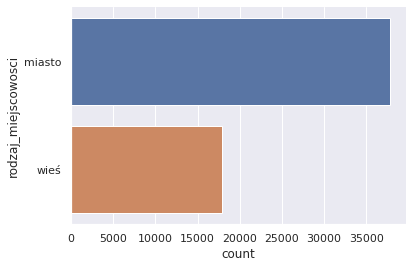

In [133]:
sns.countplot(y="rodzaj_miejscowosci", data=df)
sns.despine()

# Mapowanie publicznosc_status

In [134]:
df.publicznosc_status.dtype

CategoricalDtype(categories=['niepubliczna',
                  'niepubliczna bez uprawnień szkoły publicznej',
                  'niepubliczna szkoła artystyczna bez uprawnień publicznej szkoły artystycznej',
                  'niepubliczna szkoła artystyczna o uprawnieniach publicznej szkoły artystycznej',
                  'publiczna'],
, ordered=False)

In [135]:
df.publicznosc_status.value_counts()

publiczna                                                                         37875
niepubliczna                                                                      17536
niepubliczna szkoła artystyczna bez uprawnień publicznej szkoły artystycznej        152
niepubliczna szkoła artystyczna o uprawnieniach publicznej szkoły artystycznej      137
niepubliczna bez uprawnień szkoły publicznej                                         30
Name: publicznosc_status, dtype: int64

In [136]:
df["publicznosc_status"] = df["publicznosc_status"].map(lambda x: "niepubliczna" if "niepubliczna" in x else x)

In [137]:
df["publicznosc_status"] = df["publicznosc_status"].astype("category")

In [138]:
df.publicznosc_status.value_counts(normalize=True)

publiczna       0.679616
niepubliczna    0.320384
Name: publicznosc_status, dtype: float64

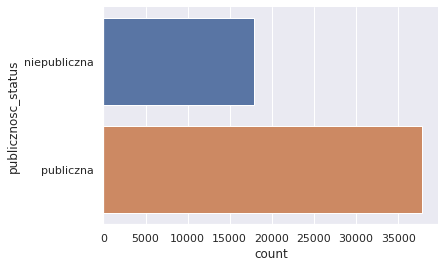

In [139]:
sns.countplot(y="publicznosc_status", data=df)
sns.despine()

# Mapowanie miejsce_w_strukturze

In [140]:
df.miejsce_w_strukturze.dtype

CategoricalDtype(categories=['filia szkoły lub placówki', 'jednostka złożona',
                  'samodzielna', 'szkoła lub placówka z filią',
                  'szkoła/placówka w zespole',
                  'szkoła/placówka wchodząca w skład jednostki złożonej',
                  'zespół'],
, ordered=False)

In [141]:
df.miejsce_w_strukturze.value_counts()

samodzielna                                             33662
szkoła/placówka w zespole                               13606
zespół                                                   5245
szkoła/placówka wchodząca w skład jednostki złożonej     1640
jednostka złożona                                         654
filia szkoły lub placówki                                 551
szkoła lub placówka z filią                               372
Name: miejsce_w_strukturze, dtype: int64

In [142]:
df.miejsce_w_strukturze = df.miejsce_w_strukturze.map(lambda x: x if x == "samodzielna" else "zespół/filia")

In [143]:
df.miejsce_w_strukturze = df.miejsce_w_strukturze.astype("category")

In [144]:
df.miejsce_w_strukturze.value_counts(normalize=True)

samodzielna     0.604019
zespół/filia    0.395981
Name: miejsce_w_strukturze, dtype: float64

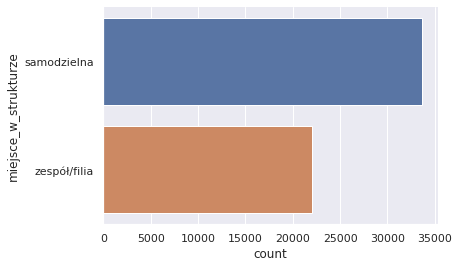

In [145]:
sns.countplot(y="miejsce_w_strukturze", data=df)
sns.despine()

# Mapowanie typ_organu_prowadzacego

In [146]:
df.typ_organu_prowadzacego.dtypes

CategoricalDtype(categories=['Fundacje', 'Gmina', 'Izba rzemieślnicza',
                  'Miasto na prawach powiatu',
                  'Minister ds. gospodarki morskiej i żeglugi śródlądowej',
                  'Minister ds. kultury i dziedzictwa narodowego',
                  'Minister ds. obrony', 'Minister ds. oświaty i wychowania',
                  'Minister ds. rolnictwa i rozwoju wsi',
                  'Minister ds. sprawiedliwości',
                  'Minister ds. wewnętrznych i administracji',
                  'Minister ds. środowiska',
                  'Organizacje Społeczne inne niż wymienione',
                  'Organizacje Wyznaniowe', 'Organizacje Związkowe',
                  'Osoba Fizyczna - Pracodawca', 'Osoba fizyczna',
                  'Powiat ziemski', 'Przedsiębiorstwa Osób Fizycznych',
                  'Przedsiębiorstwo Państwowe',
                  'Samorząd Gospodarczy i Zawodowy', 'Samorząd województwa',
                  'Samorządowa osoba prawna', 'S

In [147]:
df.typ_organu_prowadzacego.value_counts()

Gmina                                                     17650
Miasto na prawach powiatu                                  8736
Osoba fizyczna                                             8185
Powiat ziemski                                             7992
Spółki Handlowe                                            4288
Stowarzyszenia                                             3608
Fundacje                                                   1435
Organizacje Wyznaniowe                                      949
Samorząd województwa                                        713
Minister ds. kultury i dziedzictwa narodowego               502
Przedsiębiorstwa Osób Fizycznych                            488
Osoba Fizyczna - Pracodawca                                 283
Minister ds. rolnictwa i rozwoju wsi                        275
Uczelnia Niepubliczna                                       148
Minister ds. sprawiedliwości                                119
Organizacje Społeczne inne niż wymienion

In [148]:
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: "Ministerstwo" if "Minister" in x else x)

In [149]:
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: "Samorząd" if "Samorząd" in x else x)
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: "Uczelnia" if "Uczelnia" in x else x)
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: "Organizacje" if "Organizacje" in x else x)
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(lambda x: "Osoba fizyczna" if "Osoba Fizyczna" in x else x)
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(
    lambda x: "Przedsiębiorstwa/Izby/Spoldzielnie/Uczelnia"
    if "Przedsiębiorstw" in x or "Izba" in x or "Spółdzielnia" in x or "Uczelnia" in x
    else x
)
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.map(
    lambda x: "Stowrzyszenia/Fundacje/Organizacje"
    if "Stowarzyszenia" in x or "Fundacje" in x or "Organizacje" in x
    else x
)

In [150]:
df.typ_organu_prowadzacego = df.typ_organu_prowadzacego.astype("category")

In [151]:
df.typ_organu_prowadzacego.value_counts(normalize=True)

Gmina                                          0.316706
Miasto na prawach powiatu                      0.156756
Osoba fizyczna                                 0.151947
Powiat ziemski                                 0.143406
Stowrzyszenia/Fundacje/Organizacje             0.109438
Spółki Handlowe                                0.076942
Ministerstwo                                   0.016759
Przedsiębiorstwa/Izby/Spoldzielnie/Uczelnia    0.014283
Samorząd                                       0.013763
Name: typ_organu_prowadzacego, dtype: float64

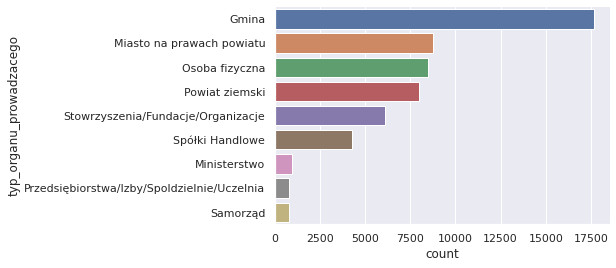

In [152]:
sns.countplot(y="typ_organu_prowadzacego", data=df, order=df["typ_organu_prowadzacego"].value_counts().index)
sns.despine()

# Mapowanie gmina_typ

In [153]:
df.gmina_typ.value_counts()

gmina miejska                22938
gmina wiejska                13115
miasto                        8472
obszar wiejski                4761
delegatura                    3813
dzielnica                     2607
Szczecińska gmina wiejska       24
Name: gmina_typ, dtype: int64

In [154]:
df[df["gmina_typ"] == "Szczecińska "][["miejscowosc", "gmina"]]

,miejscowosc,gmina


In [155]:
df["gmina_typ"] = df["gmina_typ"].map(lambda x: "gmina wiejska" if "Szczecińska" in x else x)

In [156]:
df["gmina_typ"] = df["gmina_typ"].map(lambda x: "miasto" if "delegatura" in x else x)
df["gmina_typ"] = df["gmina_typ"].map(lambda x: "miasto" if "dzielnica" in x else x)
df["gmina_typ"] = df["gmina_typ"].map(lambda x: "gmina wiejska" if "obszar wiejski" in x else x)

In [157]:
df.gmina_typ.value_counts(normalize=True)

gmina miejska    0.411592
gmina wiejska    0.321191
miasto           0.267217
Name: gmina_typ, dtype: float64

In [158]:
df.gmina_typ = df.gmina_typ.astype("category")

In [159]:
df.gmina_typ.value_counts()

gmina miejska    22938
gmina wiejska    17900
miasto           14892
Name: gmina_typ, dtype: int64

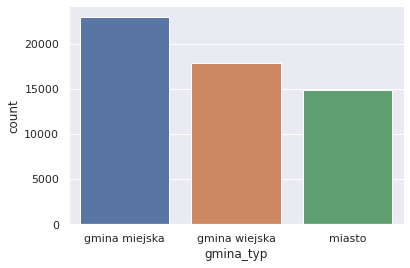

In [160]:
sns.countplot(x="gmina_typ", data=df)
sns.despine()

In [161]:
lista_ = [
    "rodzaj_miejscowosci",
    "publicznosc_status",
    "kategoria_uczniow",
    "specyfika_placowki",
    "typ_organu_prowadzacego",
    "miejsce_w_strukturze",
    "gmina_typ",
    "school_typ_cat",
]
for col in lista_:
    print("{}".format(df[col].value_counts(normalize=True)))

miasto    0.679042
wieś      0.320958
Name: rodzaj_miejscowosci, dtype: float64
publiczna       0.679616
niepubliczna    0.320384
Name: publicznosc_status, dtype: float64
Dzieci lub młodzież    0.668886
Bez kategorii          0.302512
Dorośli                0.028602
Name: kategoria_uczniow, dtype: float64
brak specyfiki    0.953975
specjalna         0.046025
Name: specyfika_placowki, dtype: float64
Gmina                                          0.316706
Miasto na prawach powiatu                      0.156756
Osoba fizyczna                                 0.151947
Powiat ziemski                                 0.143406
Stowrzyszenia/Fundacje/Organizacje             0.109438
Spółki Handlowe                                0.076942
Ministerstwo                                   0.016759
Przedsiębiorstwa/Izby/Spoldzielnie/Uczelnia    0.014283
Samorząd                                       0.013763
Name: typ_organu_prowadzacego, dtype: float64
samodzielna     0.604019
zespół/filia    0.39598

In [162]:
df.kategoria_uczniow.value_counts()

Dzieci lub młodzież    37277
Bez kategorii          16859
Dorośli                 1594
Name: kategoria_uczniow, dtype: int64

In [163]:
df[["kategoria_uczniow", "school_typ_cat"]].value_counts().sort_values()

kategoria_uczniow    school_typ_cat                     
Dorośli              Gimnazium                                  1
Dzieci lub młodzież  Gimnazium                                  7
Dorośli              Szkoła podstawowa                        145
Dzieci lub młodzież  Other                                    566
Bez kategorii        Szkoła podstawowa                        630
                     Szkolnictwo średnie                      909
Dorośli              Szkolnictwo średnie                     1448
Bez kategorii        Szkolnictwo policealne                  2597
                     Zespół szkół i placówek oświatowych     5245
                     Other                                   5661
Dzieci lub młodzież  Szkolnictwo średnie                     6839
                     Wczesna opieka i edukacja              13879
                     Szkoła podstawowa                      14316
dtype: int64

# Wiek szkoły

In [164]:
df["rok_zalozenia_cat"] = df["data_zalozenia"].map(lambda x: x.split("-")[0])
df["rok_zalozenia_cat"] = df["rok_zalozenia_cat"].astype("int")

In [165]:
rok_biezacy = date.today().year

df["school_age"] = int(rok_biezacy) - df["rok_zalozenia_cat"]

In [166]:
print(
    "Liczba szkół i placowek oświatowych mających ponad 100 lat: {}".format(
        df[df.school_age > 100]["numer_rspo"].count()
    )
)

Liczba szkół i placowek oświatowych mających ponad 100 lat: 1629


In [167]:
df.nlargest(5, columns="school_age", keep="first")[
    ["typ", "nazwa", "school_age", "data_zalozenia", "wojewodztwo", "miejscowosc"]
]

,typ,nazwa,school_age,data_zalozenia,wojewodztwo,miejscowosc
8063,Placówka Kształcenia Ustawicznego - bez szkół,FEDERACJA STOWARZYSZEŃ NAUKOWO- TECHNICZNYCH N...,440,1582-01-01,WIELKOPOLSKIE,Piła
10312,Liceum ogólnokształcące,LICEUM OGÓLNOKSZTAŁCĄCE ŚW. MARII MAGDALENY,440,1582-01-01,WIELKOPOLSKIE,Poznań
25097,Szkoła podstawowa,SZKOŁA PODSTAWOWA W BRAŃSKU,440,1582-01-01,PODLASKIE,Brańsk
31364,Szkoła podstawowa,SZKOŁA PODSTAWOWA W RZEGNOWIE,440,1582-01-01,MAZOWIECKIE,Rzęgnowo
35704,Szkoła podstawowa,SZKOŁA PODSTAWOWA NR 293 IM. JANA KOCHANOWSKIEGO,440,1582-01-01,MAZOWIECKIE,Bielany


In [168]:
age_max = df["school_age"].max()

step = 25


def prep(x):

    diff = range(0, age_max, step)
    for i in diff:
        if x >= i and x < i + step:
            return i


df["school_age_map"] = df["school_age"].map(prep)

df["school_age_map"] = df["school_age"].map(lambda x: 150 if x >= 150 else x)

In [169]:
school_avg_age = df.school_age.mean()
print("średni wiek szkoly: {}".format(round(school_avg_age, 2)))

średni wiek szkoly: 28.47


/home/magdalena/Dokumenty/way-to-school/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


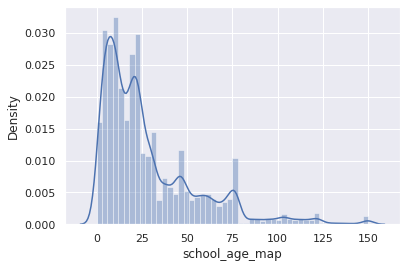

In [170]:
sns.distplot(df["school_age_map"]);

/home/magdalena/Dokumenty/way-to-school/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


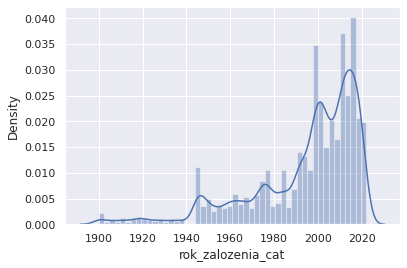

In [171]:
sns.distplot(df[df["rok_zalozenia_cat"] >= 1900]["rok_zalozenia_cat"]);

<AxesSubplot:xlabel='school_age', ylabel='school_typ_cat'>

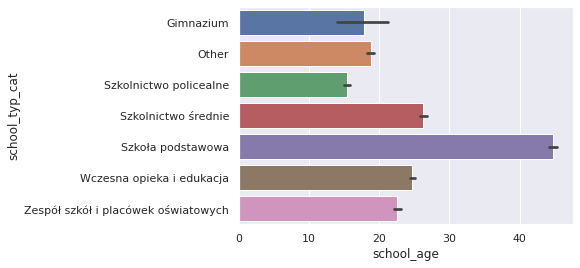

In [172]:
sns.barplot(y=df["school_typ_cat"], x=df["school_age"])

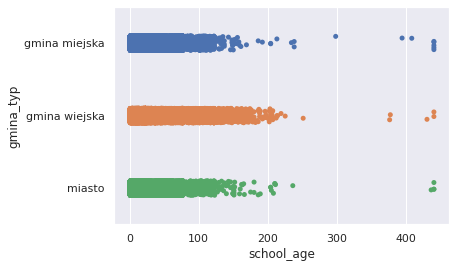

In [173]:
sns.stripplot(y=df["gmina_typ"], x=df["school_age"]);

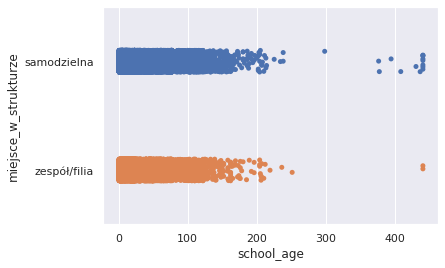

In [174]:
sns.stripplot(y=df["miejsce_w_strukturze"], x=df["school_age"]);

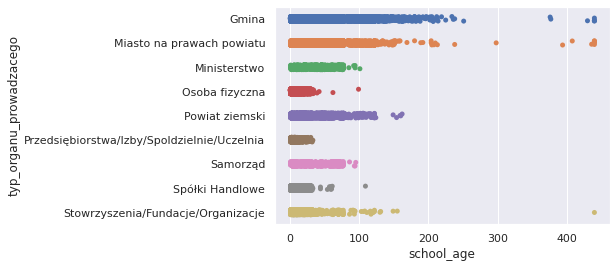

In [175]:
sns.stripplot(y=df["typ_organu_prowadzacego"], x=df["school_age"]);

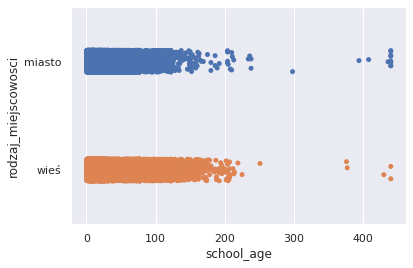

In [176]:
sns.stripplot(y=df["rodzaj_miejscowosci"], x=df["school_age"]);

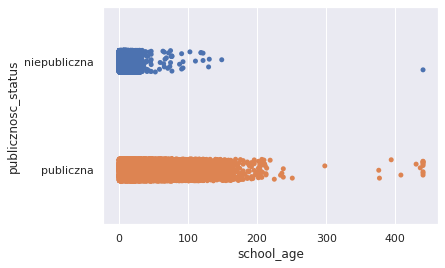

In [177]:
sns.stripplot(y=df["publicznosc_status"], x=df["school_age"]);

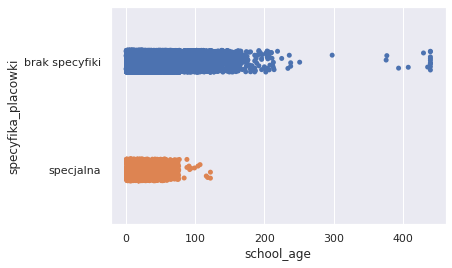

In [178]:
sns.stripplot(y=df["specyfika_placowki"], x=df["school_age"]);

# Szkoły wg wojewodztwa

In [179]:
df_agg_prov = (
    df.groupby(["wojewodztwo"])
    .agg(
        school_count=("numer_rspo", lambda x: len(set(x))),
        area_ha_prov=("area_ha_prov", "max"),
        area_km_prov=("area_km_prov", "max"),
        powiat_count=("powiat", lambda x: len(set(x))),
        gmina_count=("gmina", lambda x: len(set(x))),
        population_total=("population_total_prov", "max"),
        population_per_km=("population_per_1km_prov", "max"),
        school_mean_age=("school_age", "mean"),
    )
    .reset_index()
)

In [180]:
df_agg_prov["school_count_km"] = df_agg_prov["school_count"] / df_agg_prov["area_km_prov"]
df_agg_prov["school_km_population_km"] = df_agg_prov["school_count_km"] / df_agg_prov["population_per_km"]


df_agg_prov.sort_values(by="school_count_km", ascending=False)

,wojewodztwo,school_count,area_ha_prov,area_km_prov,powiat_count,gmina_count,population_total,population_per_km,school_mean_age,school_count_km,school_km_population_km
14,ŚLĄSKIE,6133,1233309,12333,36,190,4492330,364,28.900701,0.497284,0.001366
5,MAŁOPOLSKIE,5458,1518279,15183,22,232,3410441,225,32.219311,0.359481,0.001598
4,MAZOWIECKIE,7935,3555847,35559,42,389,5425028,153,26.887461,0.223150,0.001458
7,PODKARPACKIE,3487,1784576,17846,25,194,2121229,119,36.847433,0.195394,0.001642
0,DOLNOŚLĄSKIE,3791,1994670,19947,30,227,2891321,145,24.389871,0.190054,0.001311
13,ŁÓDZKIE,3401,1821895,18219,24,212,2437970,134,28.473096,0.186673,0.001393
9,POMORSKIE,3345,1832368,18323,20,140,2346671,128,24.469357,0.182557,0.001426
11,WIELKOPOLSKIE,5254,2982650,29826,35,325,3496450,117,28.143319,0.176155,0.001506
15,ŚWIĘTOKRZYSKIE,1981,1171050,11710,14,141,1224626,105,26.399293,0.169172,0.001611
6,OPOLSKIE,1544,941187,9412,12,102,976774,104,26.584197,0.164046,0.001577


In [181]:
school_mean = df_agg_prov.school_count.mean()
print("średnia ilosc szkół wg province: {}".format(round(school_mean, 0)))

średnia ilosc szkół wg province: 3483.0


In [182]:
df["school_mean"] = school_mean

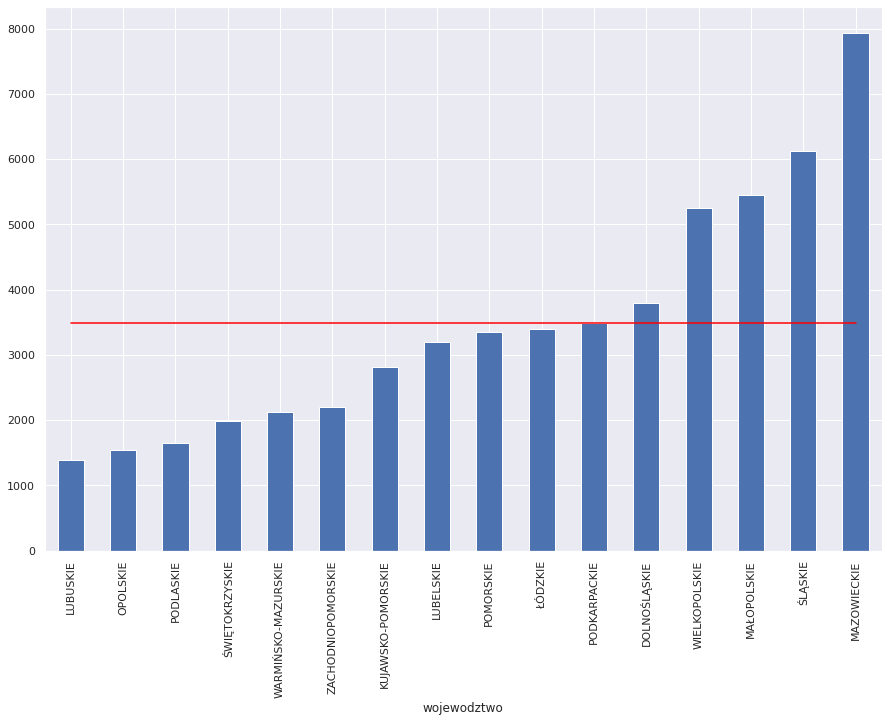

In [183]:
ax = plt.gca()
df.groupby(["wojewodztwo"])["school_mean"].max().transpose().plot(
    x="school_mean", y="wojewodztwo", kind="line", figsize=(15, 10), ax=ax, color="red"
)
df.groupby(["wojewodztwo"])["numer_rspo"].count().sort_values(ascending=True).plot(kind="bar", figsize=(15, 10), ax=ax)
plt.show();

In [184]:
df["school_mean_age"] = df.school_age.mean()

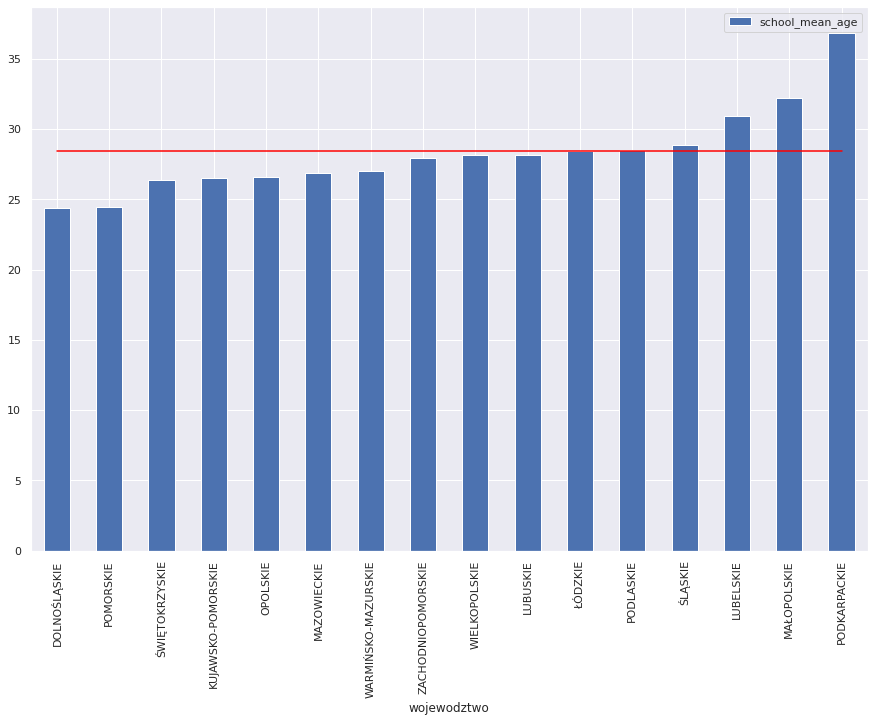

In [185]:
ax = plt.gca()
df.groupby(["wojewodztwo"])["school_mean_age"].max().plot(
    x="school_mean_age", y="wojewodztwo", kind="line", figsize=(15, 10), ax=ax, color="red"
)
df_agg_prov[["wojewodztwo", "school_mean_age"]].sort_values(by="school_mean_age", ascending=True).plot(
    x="wojewodztwo", y="school_mean_age", kind="bar", figsize=(15, 10), ax=ax
)
plt.show();

In [186]:
df.select_dtypes("category").columns

Index(['typ', 'wojewodztwo', 'rodzaj_miejscowosci', 'publicznosc_status',
       'kategoria_uczniow', 'specyfika_placowki', 'typ_organu_prowadzacego',
       'wojewodztwo_organu_prowadzacego', 'miejsce_w_strukturze',
       'typ_podmiotu_nadrzednego', 'gmina_typ', 'school_typ_cat'],
      dtype='object')

In [187]:
def prep_wykres_per_prov(typ):
    df_agg_prov_specyfika = (
        df.groupby(["wojewodztwo", typ]).agg(school_count=("numer_rspo", lambda x: len(set(x)))).reset_index()
    )

    sns.barplot(x="school_count", y="wojewodztwo", data=df_agg_prov_specyfika, hue=typ);

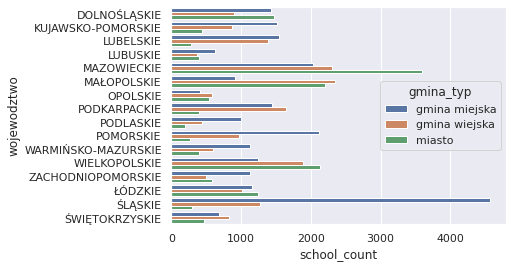

In [188]:
prep_wykres_per_prov("gmina_typ")

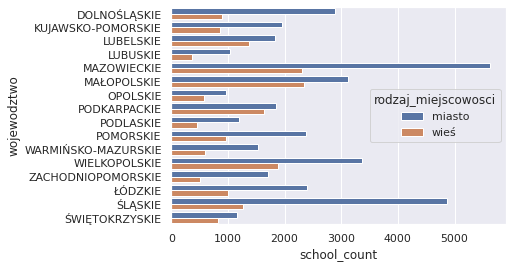

In [189]:
prep_wykres_per_prov("rodzaj_miejscowosci")

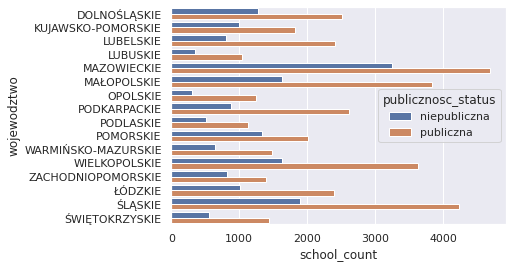

In [190]:
prep_wykres_per_prov("publicznosc_status")

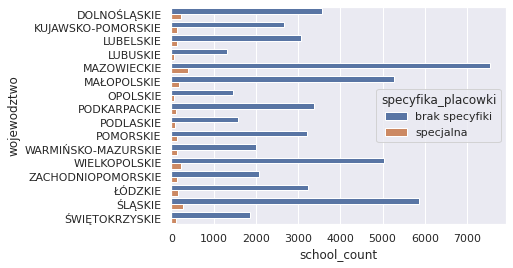

In [191]:
prep_wykres_per_prov("specyfika_placowki")

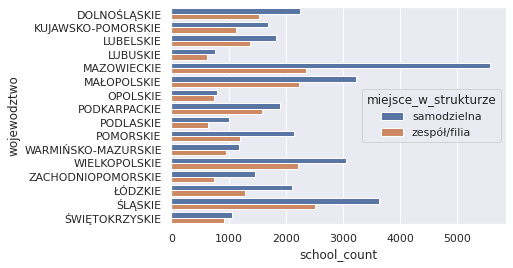

In [192]:
prep_wykres_per_prov("miejsce_w_strukturze")

# Powiaty

In [193]:
df_agg_dist = (
    df.groupby(["powiat", "wojewodztwo"])
    .agg(
        school_count=("numer_rspo", lambda x: len(set(x))),
        area_ha_prov=("area_ha_prov", "max"),
        area_km_prov=("area_km_prov", "max"),
        area_km_dist=("area_km_dist", "max"),
        gmina_count=("gmina", lambda x: len(set(x))),
        population_total_prov=("population_total_prov", "max"),
        population_per_km_prov=("population_per_1km_prov", "max"),
        population_total_dist=("population_total_dist", "max"),
        population_per_km_dist=("population_per_1km_dist", "max"),
    )
    .reset_index()
)

df_agg_dist["school_count_area"] = df_agg_dist["school_count"] / df_agg_dist["area_km_dist"]

In [194]:
df_agg_dist.sort_values(by="school_count_area", ascending=True)[:10]

,powiat,wojewodztwo,school_count,area_ha_prov,area_km_prov,area_km_dist,gmina_count,population_total_prov,population_per_km_prov,population_total_dist,population_per_km_dist,school_count_area
4264,sejneński,PODLASKIE,26.0,2018702.0,20187.0,855.0,5.0,1173286.0,58.0,19689.0,23.0,0.030409
1976,hajnowski,PODLASKIE,50.0,2018702.0,20187.0,1624.0,9.0,1173286.0,58.0,41991.0,26.0,0.030788
4600,suwalski,PODLASKIE,43.0,2018702.0,20187.0,1307.0,9.0,1173286.0,58.0,35577.0,27.0,0.032900
1143,bieszczadzki,PODKARPACKIE,38.0,1784576.0,17846.0,1139.0,4.0,2121229.0,119.0,21489.0,19.0,0.033363
4563,sulęciński,LUBUSKIE,42.0,1398793.0,13988.0,1178.0,7.0,1007145.0,72.0,35000.0,30.0,0.035654
1610,elbląski,WARMIŃSKO-MAZURSKIE,53.0,2417347.0,24173.0,1416.0,12.0,1416495.0,59.0,56986.0,40.0,0.037429
5564,łobeski,ZACHODNIOPOMORSKIE,41.0,2290472.0,22905.0,1065.0,9.0,1688047.0,74.0,36486.0,34.0,0.038498
3064,moniecki,PODLASKIE,54.0,2018702.0,20187.0,1382.0,10.0,1173286.0,58.0,40070.0,29.0,0.039074
2348,koszaliński,ZACHODNIOPOMORSKIE,65.0,2290472.0,22905.0,1653.0,12.0,1688047.0,74.0,66505.0,40.0,0.039322
1096,białostocki,PODLASKIE,118.0,2018702.0,20187.0,2975.0,22.0,1173286.0,58.0,150845.0,51.0,0.039664


In [195]:
df_agg_dist.sort_values(by="school_count_area", ascending=False)[:5]

,powiat,wojewodztwo,school_count,area_ha_prov,area_km_prov,area_km_dist,gmina_count,population_total_prov,population_per_km_prov,population_total_dist,population_per_km_dist,school_count_area
868,Warszawa,MAZOWIECKIE,2627.0,3555847.0,35559.0,517.0,19.0,5425028.0,153.0,1794166.0,3469.0,5.081238
24,Białystok,PODLASKIE,499.0,2018702.0,20187.0,102.0,1.0,1173286.0,58.0,296958.0,2908.0,4.892157
946,Zamość,LUBELSKIE,136.0,2512246.0,25123.0,30.0,1.0,2095258.0,83.0,62785.0,2069.0,4.533333
676,Siedlce,MAZOWIECKIE,145.0,3555847.0,35559.0,32.0,1.0,5425028.0,153.0,77813.0,2442.0,4.531250
110,Chorzów,ŚLĄSKIE,144.0,1233309.0,12333.0,33.0,1.0,4492330.0,364.0,106846.0,3214.0,4.363636
